In [1]:
#loading dataset
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option

#visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot

#preprocessing
from sklearn.preprocessing import StandardScaler

#data splitting
from sklearn.model_selection import train_test_split

#data modelling
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
heartdata = read_csv('heart disease data set.csv')

In [7]:
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
heartdata.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [77]:
print(heartdata.shape) #print the data dimension

(1025, 14)


In [80]:
print('\n', heartdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

 None


In [83]:
empty_data = heartdata[heartdata.isna().any(axis=1)]
print('\nThese are the missing data\n', empty_data)

heartdata.isnull().sum()



These are the missing data
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [84]:
heartdata.describe()#get the data stat using the describe method

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.4,0.7,0.9,131.6,246.0,0.1,0.5,149.1,0.3,1.1,1.4,0.8,2.3,0.5
std,9.1,0.5,1.0,17.5,51.6,0.4,0.5,23.0,0.5,1.2,0.6,1.0,0.6,0.5
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


In [10]:
corrMatrix = heartdata.corr()
print (corrMatrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

In [88]:
sns.set_style('whitegrid')

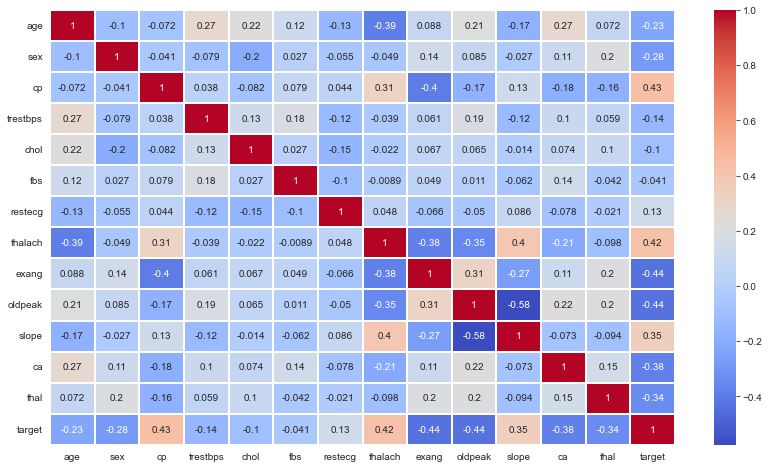

In [89]:
plt.figure(figsize=(14, 8))
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm', linewidth=0.1)
plt.show()

In [13]:
print(heartdata.skew())

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64


In [11]:
KurtosisValue = heartdata.kurtosis(axis=1)
print("Kurtosis:")
print(KurtosisValue)

Kurtosis:
0       1.461074
1       1.035835
2       0.397195
3       0.724122
4       5.663259
          ...   
1020    1.327886
1021    3.596886
1022    5.905447
1023    3.457865
1024    1.894437
Length: 1025, dtype: float64


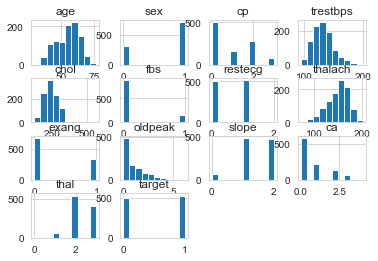

In [91]:
heartdata.hist() #density=true, bin=10, layout= (3,3) etc
pyplot.show()

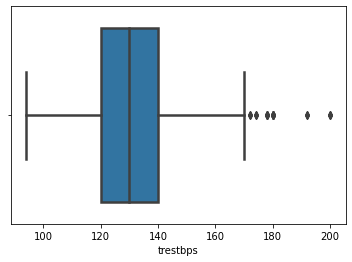

In [21]:
ax = sns.boxplot(data = heartdata, x = "trestbps", hue = "target", linewidth=2.5)

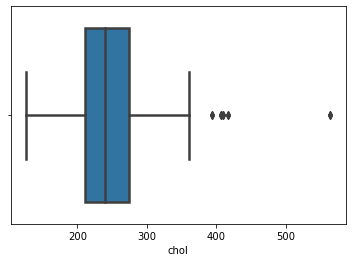

In [22]:
ax = sns.boxplot(data = heartdata, x = "chol", hue = "target", linewidth=2.5)

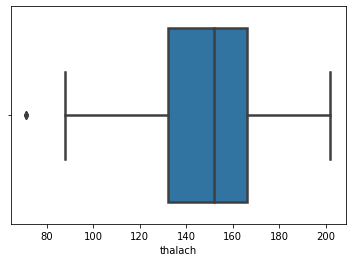

In [23]:
ax = sns.boxplot(data = heartdata, x = "thalach", hue = "target", linewidth=2.5)

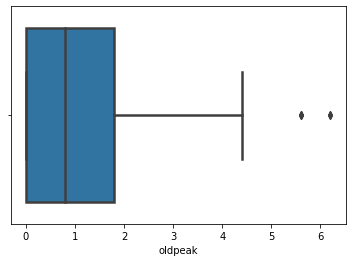

In [24]:
ax = sns.boxplot(data = heartdata, x = "oldpeak", hue = "target", linewidth=2.5)

([<matplotlib.patches.Wedge at 0x1c5ca3f5d00>,
 [Text(-0.06825262763640201, 1.6485877528420279, 'Sick'),
  Text(0.06825262763640144, -1.6485877528420279, 'Healthy')],
 [Text(-0.037228705983492004, 0.8992296833683786, '51.3%'),
  Text(0.03722870598349169, -0.8992296833683786, '48.7%')])

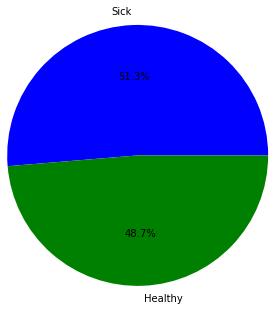

In [12]:
plt.pie(heartdata['target'].value_counts(), labels=['Sick','Healthy'], colors=['blue','green'], autopct='%1.1f%%', radius=1.5)

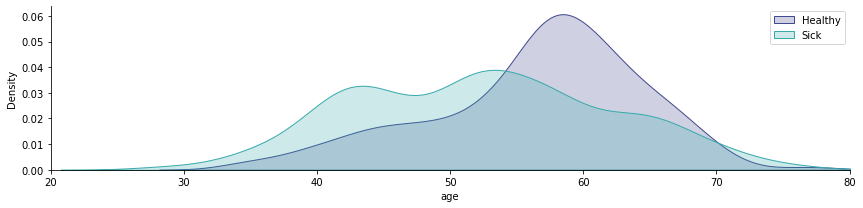

In [6]:
fig = sns.FacetGrid(heartdata, hue="target",aspect=4, palette='mako')
fig.map(sns.kdeplot,'age',shade= True)
fig.set(xlim=(20,80))
plt.legend(labels=['Healthy' , 'Sick'])

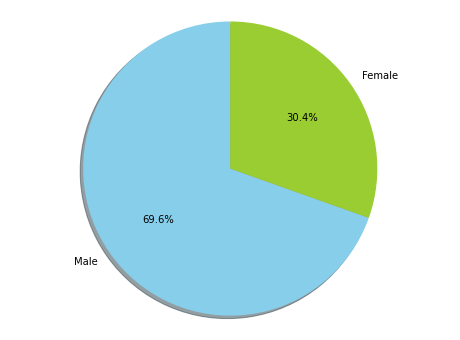

<AxesSubplot:xlabel='age', ylabel='Count'>

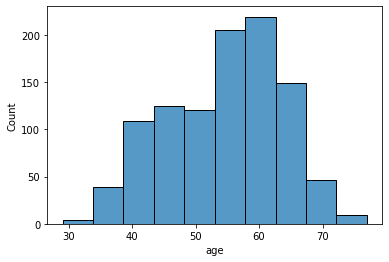

In [48]:
#sex
male =len(heartdata[heartdata['sex'] == 1])
female = len(heartdata[heartdata['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

sns.histplot(heartdata['age'], bins= 10)



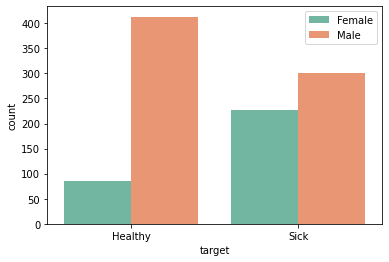

In [47]:
fig = sns.countplot(x = 'target', data = heartdata, hue = 'sex', palette='Set2')
fig.set_xticklabels(labels=['Healthy', 'Sick'])
plt.legend(['Female', 'Male'])

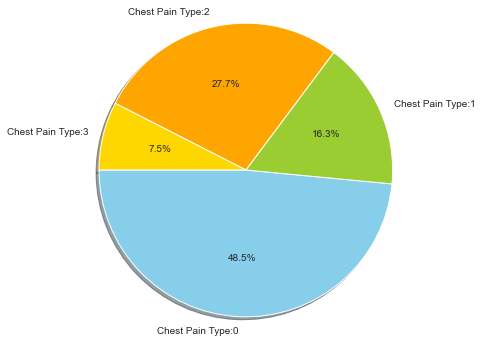

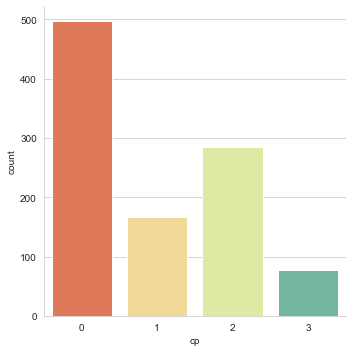

In [96]:
#chest pain type
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(heartdata[heartdata['cp'] == 0]),len(heartdata[heartdata['cp'] == 1]),
         len(heartdata[heartdata['cp'] == 2]),
         len(heartdata[heartdata['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

sns.catplot(x='cp', data=heartdata, kind="count", palette='Spectral')

[Text(0, 0, 'pain type 0'),
 Text(1, 0, 'pain type 1'),
 Text(2, 0, 'pain type 2'),
 Text(3, 0, 'pain type 3')]

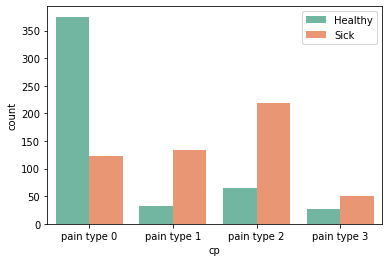

In [34]:
fig = sns.countplot(x = 'cp', data = heartdata, hue = 'target', palette='Set2')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'])

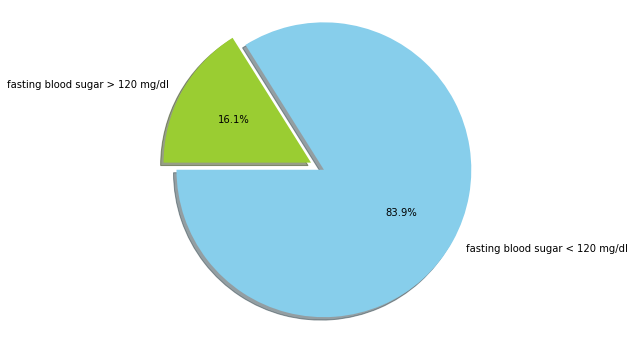

[Text(0, 0, 'low blood sugar'), Text(1, 0, 'high blood sugar')]

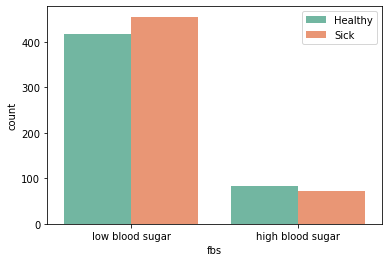

In [35]:
#fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(heartdata[heartdata['fbs'] == 0]),len(heartdata[heartdata['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

fig = sns.countplot(x = 'fbs', data = heartdata, hue = 'target', palette='Set2')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'low blood sugar','high blood sugar'])

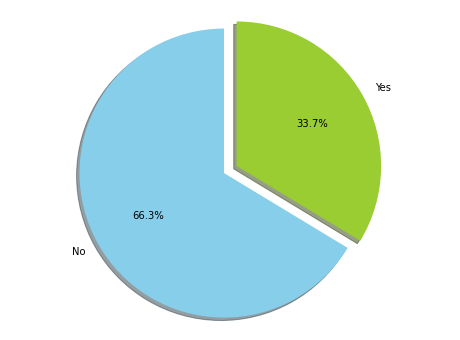

[Text(0, 0, 'no angina'), Text(1, 0, 'with angina')]

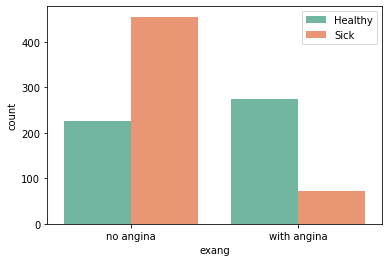

In [37]:
# exang: exercise induced angina (1 = yes; 0 = no)
# exang or exercise induced angina is a feeling like pressure in the chest, arm or jaw. 
# It frequently may occur with exercise or stress.

plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(heartdata[heartdata['exang'] == 0]),len(heartdata[heartdata['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()
    
fig = sns.countplot(x = 'exang', data = heartdata, hue = 'target', palette='Set2')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'no angina','with angina'])

<AxesSubplot:xlabel='thalach', ylabel='Count'>

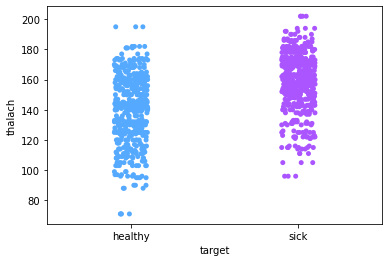

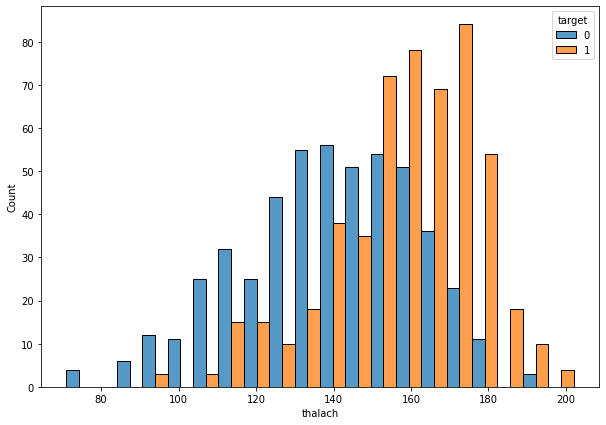

In [42]:
#thalach - maximum heart rate achieved
fig = sns.stripplot(data=heartdata, x='target', y='thalach', palette='cool')
fig.set_xticklabels(labels=[ 'healthy','sick'])

plt.figure(figsize = [10,7])
sns.histplot(data = heartdata, x = "thalach", hue = "target", multiple = "dodge")

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

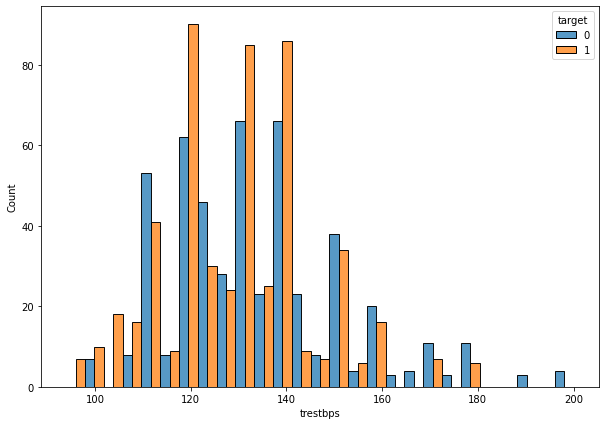

In [39]:
#trestbps: resting blood pressure 

plt.figure(figsize = [10,7])
sns.histplot(data = heartdata, x = "trestbps", hue = "target", multiple = "dodge")

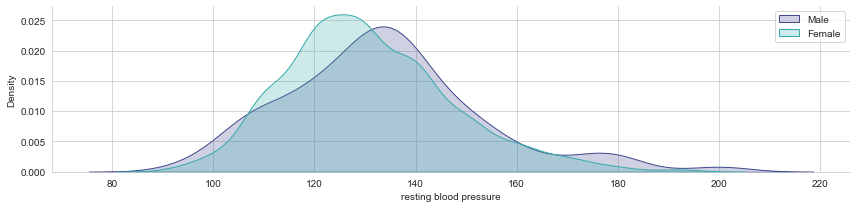

In [103]:
fig = sns.FacetGrid(heartdata, hue="sex",aspect=4, palette='mako')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Male' , 'Female'])
fig.set(xlabel = 'resting blood pressure')

<AxesSubplot:xlabel='chol', ylabel='Count'>

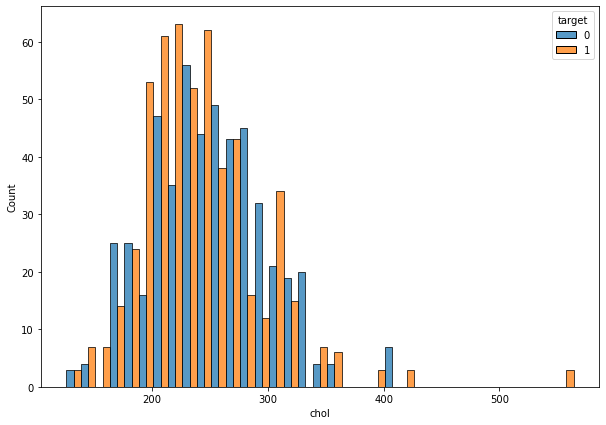

In [43]:
#chol: serum cholestoral in mg/dl
#chol or serum cholestoral in mg/dl is measured in all people. Healthy serum cholesterol is less than 200 mg/dL.

plt.figure(figsize = [10,7])
sns.histplot(data = heartdata, x = "chol", hue = "target", multiple = "dodge")

[Text(0, 0, 'value 0'), Text(1, 0, 'value 1'), Text(2, 0, 'value 2')]

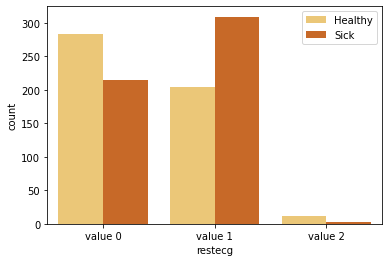

In [3]:
# Resting electrocardiographic results can have 0,1 and 2 value:
# Value 0: normal, 
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

fig = sns.countplot(x = 'restecg', data = heartdata, hue = 'target', palette='YlOrBr')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'value 0','value 1', 'value 2'])

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

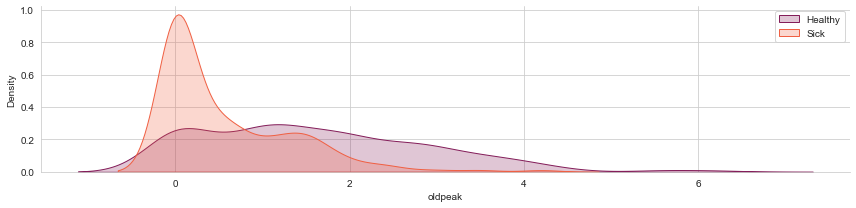

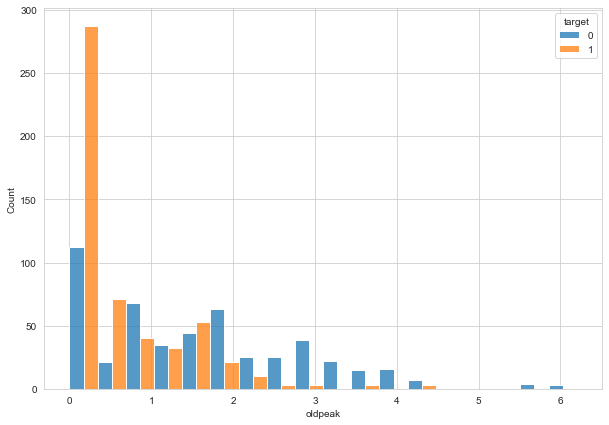

In [107]:
# old peak (ST depression- it is a finding on an electrocardiogram). 

fig = sns.FacetGrid(heartdata, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'oldpeak',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])

plt.figure(figsize = [10,7])
sns.histplot(data = heartdata, x = "oldpeak", hue = "target", multiple = "dodge")

[Text(0, 0, 'value 1'), Text(1, 0, 'value 2'), Text(2, 0, 'value 3')]

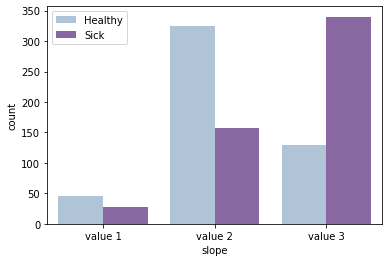

In [13]:
# The slope of the peak exercise ST segment can have 3 values:
# Value 1: upsloping, Value 2: flat, Value 3: downsloping

fig = sns.countplot(x = 'slope', data = heartdata, hue = 'target', palette='BuPu')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=[ 'value 1','value 2', 'value 3'])


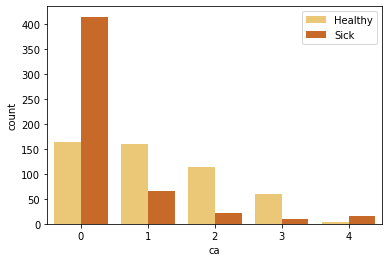

In [4]:
# ca or number of major vessels (0-4) colored by flourosopy can be 0 to 4.

fig = sns.countplot(x = 'ca', data = heartdata, hue = 'target', palette='YlOrBr')
plt.legend(['Healthy', 'Sick'])


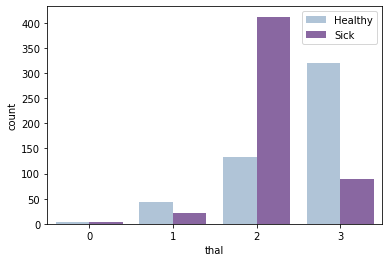

In [12]:
# Thal: A blood disorder called thalassemia can be 4 kinds in these patients.
fig = sns.countplot(x = 'thal', data = heartdata, hue = 'target', palette='BuPu')
plt.legend(['Healthy', 'Sick'])

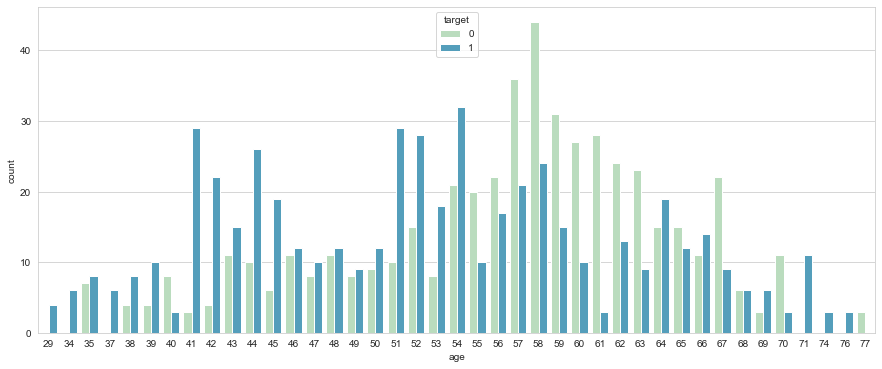

In [111]:
#age
#Number of people who have heart disease according to age 

plt.figure(figsize=(15,6))
sns.countplot(x='age',data = heartdata, hue = 'target',palette='GnBu')
plt.show()

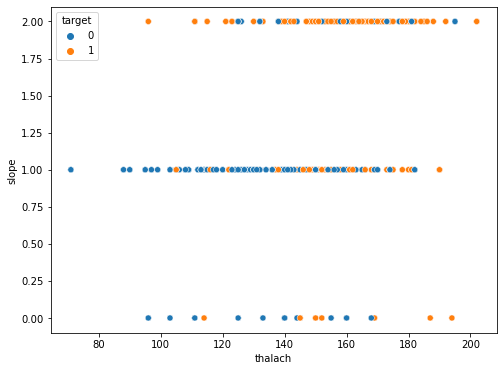

In [67]:
#Scatterplot for thalach vs slope

plt.figure(figsize=(8,6))
sns.scatterplot(x='thalach',y='slope',data=heartdata, hue='target')
plt.show()

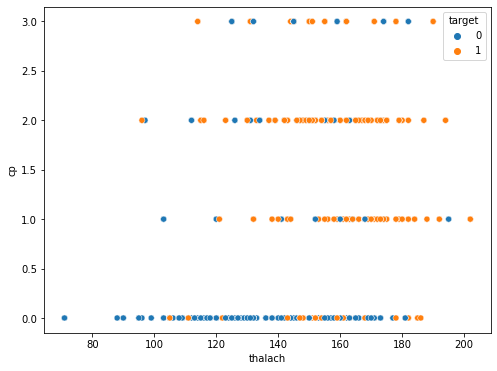

In [68]:
#Scatterplot for thalach vs cp 

plt.figure(figsize=(8,6))
sns.scatterplot(x='thalach',y='cp',data=heartdata, hue='target')
plt.show()

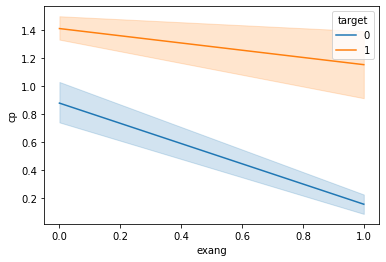

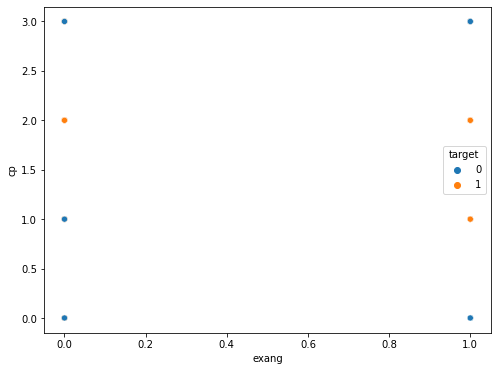

In [6]:
sns.lineplot(data=heartdata, x="exang", y="cp", hue="target")

plt.figure(figsize=(8,6))
sns.scatterplot(x='exang',y='cp',data=heartdata, hue='target')
plt.show()

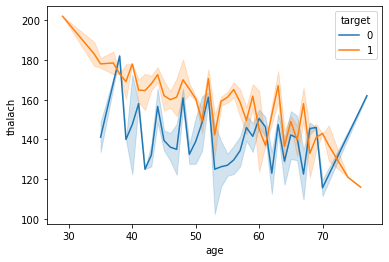

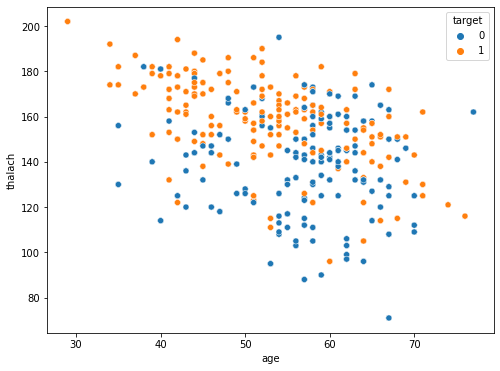

In [61]:
sns.lineplot(data=heartdata, x="age", y="thalach", hue="target")

plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='thalach',data=heartdata, hue='target')
plt.show()

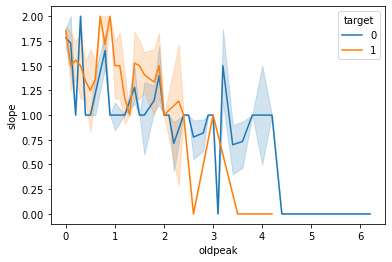

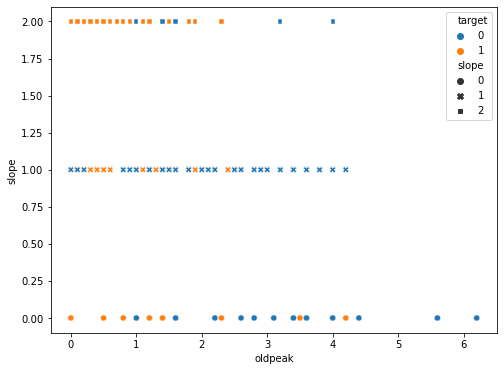

In [65]:
sns.lineplot(data=heartdata, x="oldpeak", y="slope", hue="target")

plt.figure(figsize=(8,6))
sns.scatterplot(x='oldpeak',y='slope',data=heartdata, hue='target', style= 'slope')
plt.show()

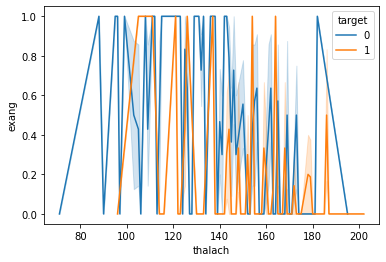

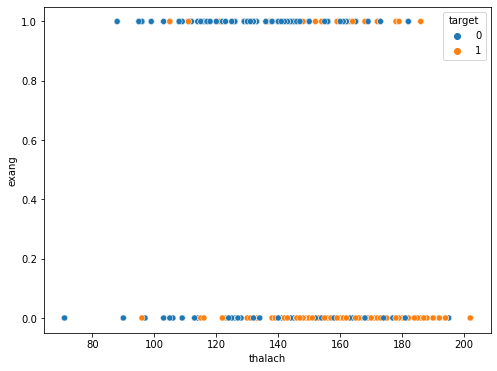

In [60]:
sns.lineplot(data=heartdata, x="thalach", y="exang", hue="target")

plt.figure(figsize=(8,6))
sns.scatterplot(x='thalach',y='exang',data=heartdata, hue='target')
plt.show()

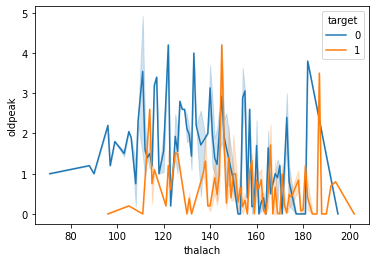

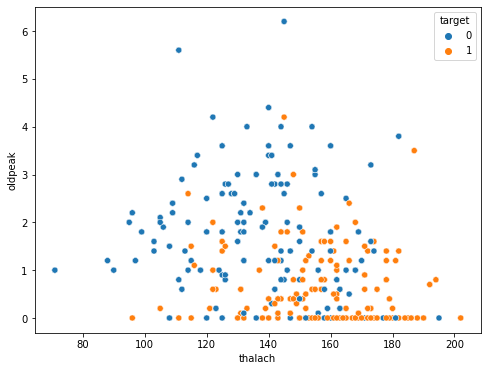

In [62]:
sns.lineplot(data=heartdata, x="thalach", y="oldpeak", hue="target")

plt.figure(figsize=(8,6))
sns.scatterplot(x='thalach',y='oldpeak',data=heartdata, hue='target')
plt.show()

In [74]:
X = heartdata.drop('target', axis=1)
y = heartdata['target']

#split the data into train and test - split using 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#check the number of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)

print(X_test[1:5].join(y_test[1:5])) #using numpy
print(X_test.tail(5).join(y_test.tail(5)))#using pandas


 The total of training dataset (717, 13)

 The total of test dataset (308, 13)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
359   53    0   2       128   216    0        0      115      0      0.0   
447   55    1   0       160   289    0        0      145      1      0.8   
31    50    0   1       120   244    0        1      162      0      1.1   
621   48    1   0       130   256    1        0      150      1      0.0   

     slope  ca  thal  target  
359      2   0     0       1  
447      1   1     3       0  
31       2   0     2       1  
621      2   2     3       0  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
668   29    1   1       130   204    0        0      202      0      0.0   
239   62    0   0       150   244    0        1      154      1      1.4   
312   70    1   2       160   269    0        1      112      1      2.9   
211   67    1   0       100   299    0        0      125      1      0.9   
861 

In [78]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [79]:
SEED = 1
my_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=SEED) #manually tuning our model

In [80]:
#train the model to fit

my_model.fit(X_train,y_train)
y_pred_train = my_model.predict(X_train)
#Printing best parameters selected through GridSearchCV
#tree_model.best_params_

In [81]:
#now let's predict the model
predict = my_model.predict(X_test)

In [82]:
#fitting our model with default configuration

#compute train set accuracy
acc_train = accuracy_score(y_train, y_pred_train)
print("\n Model Accuracy on train data: {:.2f}\n".format(acc_train))
print('Using Decision Tree we get an test accuracy score of: ', round(accuracy_score(y_test,predict),5)*100,'%')

#compute test set accuracy
acc_test = accuracy_score(y_test, predict)
print("\n Model Accuracy on test data: {:.2f}\n".format(acc_test))
print('Using Decision Tree we get an test accuracy score of: ', round(accuracy_score(y_test,predict),5)*100,'%')



 Model Accuracy on train data: 0.87

Using Decision Tree we get an test accuracy score of:  81.494 %

 Model Accuracy on test data: 0.81

Using Decision Tree we get an test accuracy score of:  81.494 %


In [83]:
#constructing a confusion matrix of the test data
matrix_info = confusion_matrix(y_test,predict)

#print the confusion matrix
print("The confusion matrix on the heart disease dataset: \n", matrix_info,  '\n')


The confusion matrix on the heart disease dataset: 
 [[116  43]
 [ 14 135]] 



In [84]:
print("Precision for Test data:")
print(precision_score(y_test, predict))

Precision for Test data:
0.7584269662921348


In [85]:
print("Recall for Test data:")
print(recall_score(y_test, predict))

Recall for Test data:
0.9060402684563759


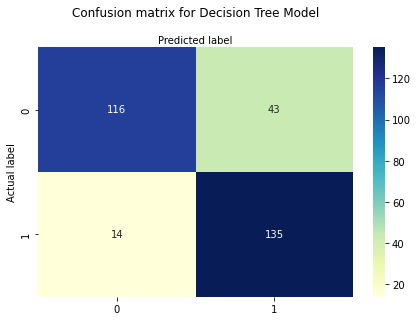

In [86]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(matrix_info), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [126]:
#construct the classification report
class_report = classification_report(y_test, predict)
print('Report of Classification: \n', class_report, '\n')

Report of Classification: 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       159
           1       0.76      0.91      0.83       149

    accuracy                           0.81       308
   macro avg       0.83      0.82      0.81       308
weighted avg       0.83      0.81      0.81       308
 



In [87]:
#calculate AUC of model
auc = roc_auc_score(y_test, predict)

#print AUC score
print(auc)

0.8178000084420244


In [129]:
#Receiver Operating Characterstic(ROC) Curve
#Get predicted probabilites
target_probailities_tree = my_model.predict_proba(X_test)[:,1]

In [130]:
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test, target_probailities_tree)

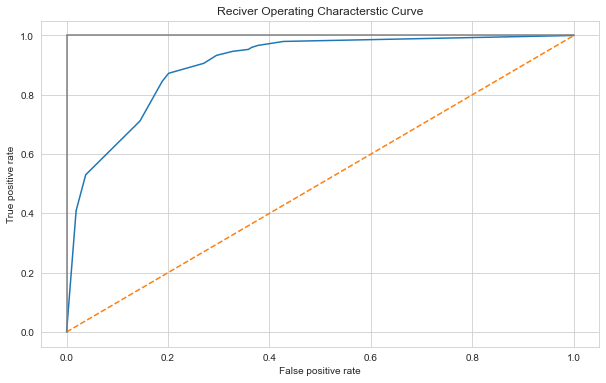

In [131]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()